# Plot the velocity and PT tracer from the coarse-resolution model

In [2]:
clear
homedir = getenv('HOME');
workdir = getenv('WORK');
scradir = getenv('SCRATCH');
campdir = getenv('CAMP');
addpath(genpath([homedir '/work_MOM']));
addpath(genpath([homedir '/mytoolbox']));
addpath(genpath([homedir '/MyFuncs']));

In [3]:
% ---- config
ik = 1;
yr_s = 21;
t_read = 120; % [day]
[yrstr, dystr, hrstr] = get_timestr(t_read, yr_s);
% ----
grid_dir = [workdir '/MOM6_exp/mom_lowRES/'];  
[grid, ~, ~] = read_grid_MOM([grid_dir '']); 

tr_fnm = [workdir '/MOM6_exp/mom_lowRES_ptemp/sol_tr_onl/tr__' yrstr '_' dystr '_' hrstr '.nc'];
uv_fnm = [workdir '/MOM6_exp/mom_lowRES_ptemp/sol_prog/prog__' yrstr '_' dystr '_' hrstr '.nc'];
uvhm_fnm = [workdir '/MOM6_exp/mom_lowRES/sol_uvhm/uvh_mean__' yrstr '_' dystr '_03.nc'];
h_fnm = [workdir '/MOM6_exp/mom_lowRES/sol_h/h_snap__' yrstr '_' dystr '_' hrstr '.nc'];
uvhm_fnm_cs = [workdir '/MOM6_OUT/forc_uvh_64/uvhm_CS_decomp_180d/uvh_mean__' yrstr '_' dystr '_03.nc'];
h_fnm_cs = [workdir '/MOM6_OUT/forc_uvh_64/sol_h/h_snap__' yrstr '_' dystr '_' hrstr '.nc'];

ds_tr = ncstruct(tr_fnm);
ds_uv = ncstruct(uv_fnm);
ds_uvhm = ncstruct(uvhm_fnm);
ds_h = ncstruct(h_fnm);
ds_uvhm_cs = ncstruct(uvhm_fnm_cs);
ds_h_cs = ncstruct(h_fnm_cs);

% ---- read
tr = ds_tr.tr1(:,:,ik);
% LR residual flow
[uh, vh] = deal(ds_uvhm.uh(:,:,ik)./grid.dyCu, ds_uvhm.vh(:,:,ik)./grid.dxCv);
[uh_p, vh_p] = uv2p_CG(uh, vh);
[up, vp] = deal(uh_p./ds_h.h(:,:,ik), vh_p./ds_h.h(:,:,ik));
spd = sqrt(up.^2 + vp.^2);
% our CS flow
[uh_cs, vh_cs] = deal(ds_uvhm_cs.uh(:,:,ik)./grid.dyCu, ds_uvhm_cs.vh(:,:,ik)./grid.dxCv);
[uh_p_cs, vh_p_cs] = uv2p_CG(uh_cs, vh_cs);
[up_cs, vp_cs] = deal(uh_p_cs./ds_h_cs.h(:,:,ik), vh_p_cs./ds_h_cs.h(:,:,ik));
spd_cs = sqrt(up_cs.^2 + vp_cs.^2);


In [4]:
% -- save data
savefnm = [homedir '/work_MOM/data_for_figure/data_fig3.mat'];
save(savefnm);

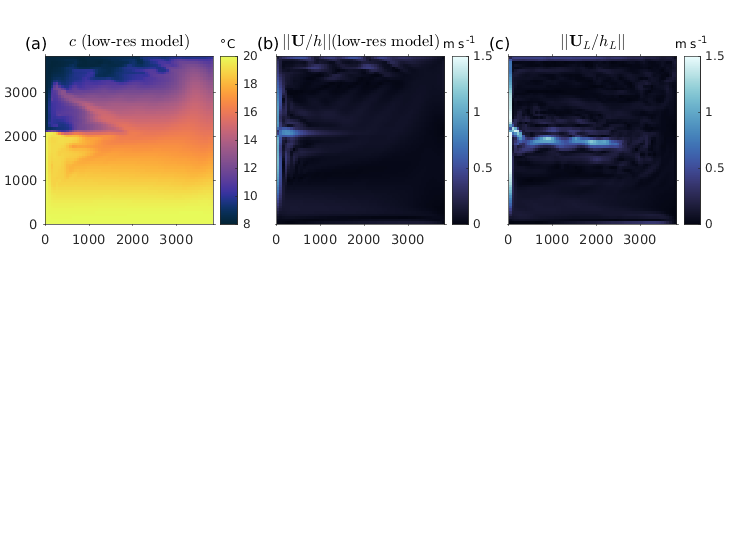

In [5]:
[x, y] = deal(grid .lonh, grid.lath);
plt_fields = {tr, spd, spd_cs};
ncel = numel(plt_fields);
clim_al = {[8 20], [0 1.5], [0 1.5]}; 
cmstr_al = {'thermal', 'ice', 'ice'};
title_al = {'$c$ (low-res model)', '$||\mathbf{U}/h||$(low-res model)', '$||\mathbf{U}_L/h_L||$'};
cbstr_al = {'\circC', 'm s^{-1}', 'm s^{-1}'};

x_top = 0.06; y_top = 0.6; h_top = 0.3; w_top = h_top; dx_top = 0.01; 
pos_top = {[x_top y_top w_top h_top], [x_top+w_top+dx_top y_top w_top h_top], [x_top+2*w_top+2*dx_top y_top w_top h_top]};
sublabels = {'(a)', '(b)', '(c)'};
% figure
font = 'DejaVu Sans';
figure('DefaultTextFontName', font, 'DefaultAxesFontName', font);

for icel = 1:ncel
    subplot('Position',pos_top{icel});
    f_do = plt_fields{icel};
    imagescn(x, y, f_do');

    if icel >= 2; set(gca,'yticklabel',''); end
    
    axis square
    set(gca,'tickdir','out');
    title(title_al{icel},'fontsize',12,'Interpreter','latex');
    caxis(clim_al{icel});
    cmocean(cmstr_al{icel})
    cb = colorbar;
    cb.Title.String = cbstr_al{icel};
    
    ax(icel) = gca;
    hdlb(icel) = subplotlabel(ax(icel),sublabels{icel},'location','northwestoutside','offset',[-0.12 0.02],'fontsize',12);
end

% --
set(gcf,'PaperPositionMode','auto'); 
fignm = [homedir '/work_MOM/figures/fig3_LRmodel'];
% exportgraphics(gcf,[fignm '.pdf'], 'BackgroundColor','white','ContentType','vector')
